In [1]:
# Import library
from urllib.request import urlopen as url, Request
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
alamat = "https://pokemondb.net/pokedex/all" 
safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'}) 
html = url(safeAdd) 
data = bs(html, 'html.parser')

In [3]:
table = data.find("table", {"id":"pokedex"}) 
rows = table.findAll("tr")
row_data = []
for row in rows: 
    cell_data = []  
    
    if row.contents[1].get_text() == "301":
        break
    for item in row.findAll(["th","td"]):
        cell_data.append(item.get_text())
    row_data.append(cell_data)

In [4]:
df_pokemon = pd.DataFrame(row_data)
df_pokemon.columns = df_pokemon.loc[0]
df_pokemon = df_pokemon[1:]
df_pokemon.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
5,0004,Charmander,Fire,309,39,52,43,60,50,65


In [5]:
df_pokemon["Attack"] = pd.to_numeric(df_pokemon["Attack"]) 
df_pokemon["Defense"] = pd.to_numeric(df_pokemon["Defense"])  
    
# Menambahkan dua kolom tranformasi 
df_pokemon["Attklog"] = np.log(df_pokemon["Attack"]) 
df_pokemon["Defflog"] = np.log(df_pokemon["Defense"])
df_pokemon.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Attklog,Defflog
1,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,3.891820,3.891820
2,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,4.127134,4.143135
3,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80,4.406719,4.418841
4,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,4.605170,4.812184
5,0004,Charmander,Fire,309,39,52,43,60,50,65,3.951244,3.761200


In [6]:
log_data = df_pokemon.loc[:, 'Attklog':'Defflog']
print(log_data.head())
log_array = np.array(log_data)

0   Attklog   Defflog
1  3.891820  3.891820
2  4.127134  4.143135
3  4.406719  4.418841
4  4.605170  4.812184
5  3.951244  3.761200


In [17]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(log_array)
df_pokemon['kluster'] = kmeans.labels_
df_pokemon.head()

C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Attklog,Defflog,kluster
1,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,3.891820,3.891820,0
2,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,4.127134,4.143135,0
3,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80,4.406719,4.418841,1
4,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,4.605170,4.812184,1
5,0004,Charmander,Fire,309,39,52,43,60,50,65,3.951244,3.761200,0


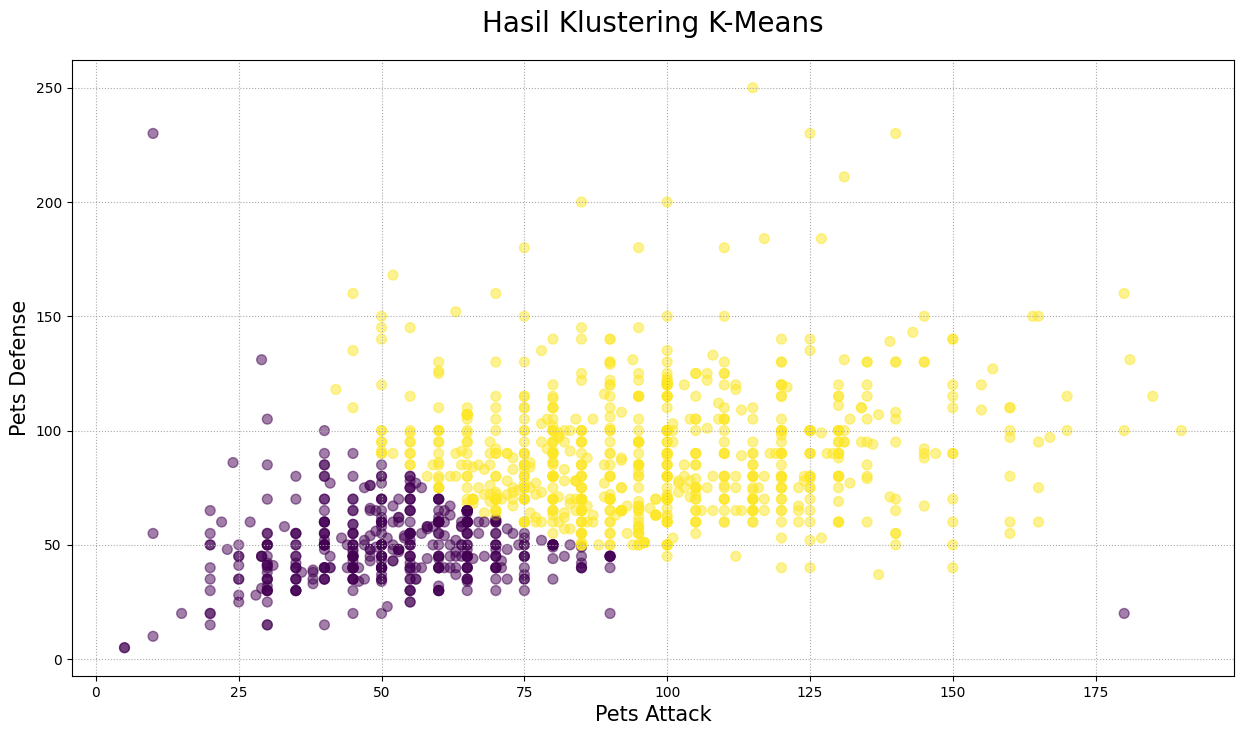

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(df_pokemon.Attack, df_pokemon.Defense, s=50, c=df_pokemon.kluster, marker="o", alpha=0.5)
plt.title("Hasil Klustering K-Means", pad=20, fontsize=20) 
plt.xlabel("Pets Attack", fontsize=15) 
plt.ylabel("Pets Defense", fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.8)
plt.show()

C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

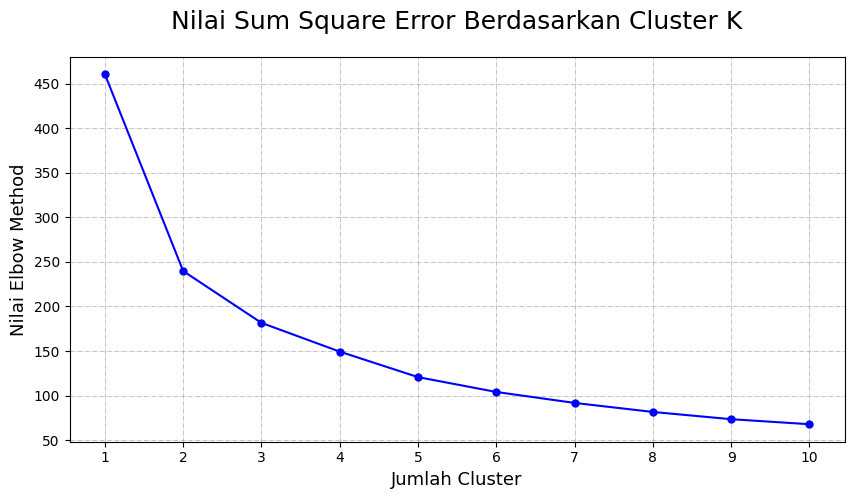

In [7]:
clust = 11
sse = [] 
k_list = [] 
for k in range(1, clust): 
    kmeans = KMeans(n_clusters = k).fit(log_array) 
    centroids = kmeans.cluster_centers_ 
    prediksi = kmeans.predict(log_array)
    nilai_sse = 0 
     
    for i in range(len(log_array)): 
        titik_pusat = centroids[prediksi[i]] 
        nilai_sse += (log_array[i, 0] - titik_pusat[0]) ** 2 + (log_array[i, 1] - titik_pusat[1]) ** 2 
        
    sse.append(nilai_sse)
    k_list.append(k)
    
plt.figure(figsize=(10,5))
plt.plot(k_list, sse, color='blue', marker='o', markersize=5)
plt.title('Nilai Sum Square Error Berdasarkan Cluster K', pad=20, fontsize=18)  
plt.xlabel('Jumlah Cluster', fontsize=13)  
plt.ylabel('Nilai Elbow Method', fontsize=13)
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.gca().set_xticks(k_list)
plt.show()

C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yudis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

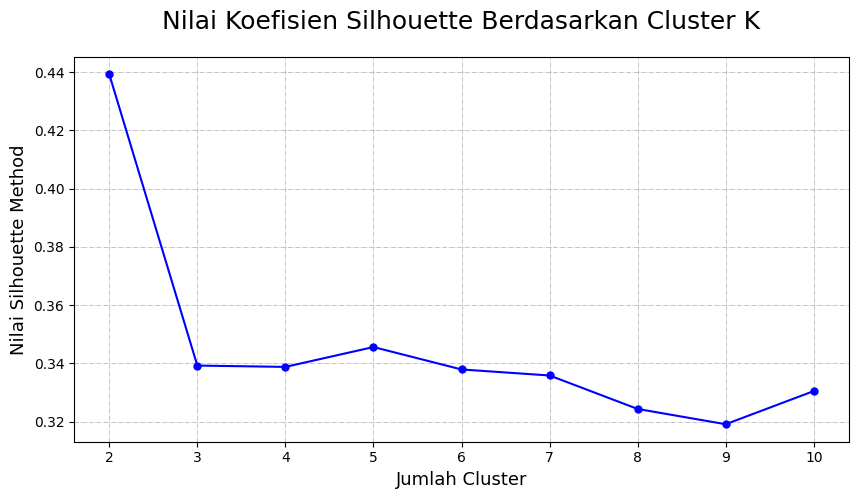

In [8]:
from sklearn.metrics import silhouette_score
clust = 11
data = [] 
k_list = []  
for k in range(2, clust): 
    kmeans = KMeans(n_clusters = k).fit(log_array) 
    labels = kmeans.labels_ 
    data.append(silhouette_score(log_array, labels, metric = 'euclidean')) 
    k_list.append(k)
plt.figure(figsize=(10,5))
plt.plot(k_list, data, color='blue', marker='o', markersize=5)
plt.title('Nilai Koefisien Silhouette Berdasarkan Cluster K', pad=20, fontsize=18)  
plt.xlabel('Jumlah Cluster', fontsize=13)  
plt.ylabel('Nilai Silhouette Method', fontsize=13)
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.gca().set_xticks(k_list)
plt.show()